* **이번 노트북의 실습은 FinanceDataReader의 여러 종목 가격을 한번에** 자료를 참고하여 만들어 졌습니다.
* 참고 링크 :  [FinanceDataReader 여러 종목 가격을 한번에](https://nbviewer.jupyter.org/github/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20%EC%97%AC%EB%9F%AC%20%EC%A2%85%EB%AA%A9%EC%9D%98%20%EA%B0%80%EA%B2%A9%EC%9D%84%20%ED%95%9C%EB%B2%88%EC%97%90.ipynb)


## 라이브러리 불러오기

In [1]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd
import numpy as np

* [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

In [2]:
# colab 을 사용한다면 런타임이 초기화 될때마다 다시 설치해 주어야 합니다.
# 로컬 컴퓨터에 설치했다면 이전에 설치된 라이브러리를 사용해 주시면 됩니다.
# !pip install -U finance-datareader

In [3]:
# FinanceDataReader 를 fdr 별칭으로 불러오기
import FinanceDataReader as fdr

## 상장종목 목록 가져오기

* 다음의 형태가 되도록 만들어 주세요.

|    | 종목별           |
|---:|:-----------------|
|  1 | 삼성전자         |
|  2 | LG에너지솔루션   |
|  3 | SK하이닉스       |
|  4 | 삼성바이오로직스 |
|  5 | NAVER            |
|  6 | 삼성SDI          |
|  7 | 현대차           |
|  8 | LG화학           |
|  9 | 카카오           |
| 10 | 기아             |

In [4]:
url = "https://finance.naver.com/sise/entryJongmok.naver?&page=1"
print(url)

https://finance.naver.com/sise/entryJongmok.naver?&page=1


In [5]:
table_list = pd.read_html(url)
table_list

[         종목별       현재가      전일비     등락률         거래량   거래대금(백만)    시가총액(억)
 0        NaN       NaN      NaN     NaN         NaN        NaN        NaN
 1       삼성전자   60000.0   2500.0  +4.35%  18529955.0  1094714.0  3581870.0
 2   LG에너지솔루션  400000.0    500.0  +0.13%    145489.0    57947.0   936000.0
 3     SK하이닉스   98700.0   4700.0  +5.00%   4439335.0   432875.0   718538.0
 4   삼성바이오로직스  817000.0   8000.0  -0.97%     38881.0    31743.0   581492.0
 5        현대차  183500.0   1000.0  +0.55%    763863.0   138829.0   392081.0
 6      NAVER  231000.0   2500.0  -1.07%    812766.0   187361.0   378953.0
 7      삼성SDI  548000.0   7000.0  +1.29%    228195.0   125279.0   376830.0
 8       LG화학  512000.0  18000.0  -3.40%    228624.0   117511.0   361433.0
 9         기아   79100.0    300.0  +0.38%   1114995.0    87527.0   320642.0
 10       카카오   70100.0   2000.0  -2.77%   1461046.0   102679.0   311909.0
 11       NaN       NaN      NaN     NaN         NaN        NaN        NaN
 12       NaN       NaN  

In [6]:
df_stock = table_list[0].dropna()
df_stock["종목별"]

1         삼성전자
2     LG에너지솔루션
3       SK하이닉스
4     삼성바이오로직스
5          현대차
6        NAVER
7        삼성SDI
8         LG화학
9           기아
10         카카오
Name: 종목별, dtype: object

In [7]:
df_top = df_stock[["종목별"]]
df_top

,종목별
1,삼성전자
2,LG에너지솔루션
3,SK하이닉스
4,삼성바이오로직스
5,현대차
6,NAVER
7,삼성SDI
8,LG화학
9,기아
10,카카오


## 전체 상장종목에서 종목코드와 종목명만 가져오기

* 아래의 형태가 되게 해주세요.

| Name             |   Symbol |
|:-----------------|---------:|
| 삼성전자         |   005930 |
| LG에너지솔루션   |   373220 |
| SK하이닉스       |   000660 |
| 삼성바이오로직스 |   207940 |
| NAVER            |   035420 |

In [8]:
df_krx = fdr.StockListing("KRX")
df_krx.head(2)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시


In [9]:
df_krx = df_krx[["Name", "Symbol"]]
df_krx.head()

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840
3,APS홀딩스,054620
4,AP시스템,265520


## merge 를 통한 시가총액 상위 10개 종목 만들기

### merge
<img src="https://pandas.pydata.org/docs/_images/08_merge_left.svg">

<img src="https://i.imgur.com/nD1Hwdl.png" width=500>



* 아래의 형태가 되게 만들며, Name을 인덱스로 지정합니다.

| Name             |   Symbol |
|:-----------------|---------:|
| 삼성전자         |   005930 |
| LG에너지솔루션   |   373220 |
| SK하이닉스       |   000660 |
| 삼성바이오로직스 |   207940 |
| NAVER            |   035420 |
| 삼성SDI          |   006400 |
| 현대차           |   005380 |
| LG화학           |   051910 |
| 카카오           |   035720 |
| 기아             |   000270 |

In [10]:
df_top10 = df_top.merge(df_krx, left_on="종목별", right_on="Name", how="left")
df_top10 = df_top10[["Name", "Symbol"]]
df_top10

,Name,Symbol
0,삼성전자,005930
1,LG에너지솔루션,373220
2,SK하이닉스,000660
3,삼성바이오로직스,207940
4,현대차,005380
5,NAVER,035420
6,삼성SDI,006400
7,LG화학,051910
8,기아,000270
9,카카오,035720


## 여러 종목의 종가 수집
* 종목코드로 수집이 가능합니다.
* 종목명을 찾아서 일별 시세를 수집해 주는 함수를 만들어 볼 예정입니다.

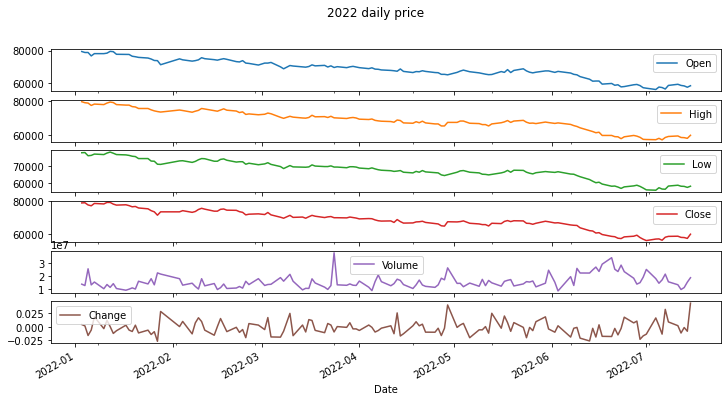

In [11]:
# "005930" 삼성전자의 일별시세
_ = fdr.DataReader("005930", "2022").plot(subplots=True, figsize=(12, 6),
                                          title="2022 daily price")

In [12]:
# OHLC 중에 Close 중에 종가만 사용합니다.
fdr.DataReader("005930", "2022")["Close"]

Date
2022-01-03    78600
2022-01-04    78700
2022-01-05    77400
2022-01-06    76900
2022-01-07    78300
              ...  
2022-07-11    58800
2022-07-12    58100
2022-07-13    58000
2022-07-14    57500
2022-07-15    60000
Name: Close, Length: 132, dtype: int64

In [22]:
df_top10

,Name,Symbol
0,삼성전자,005930
1,LG에너지솔루션,373220
2,SK하이닉스,000660
3,삼성바이오로직스,207940
4,현대차,005380
5,NAVER,035420
6,삼성SDI,006400
7,LG화학,051910
8,기아,000270
9,카카오,035720


In [13]:
# 반복문을 사용하여 시가총액 10위 종목의 2022년 일별 시세의 종가를 가져옵니다.
# 반복문을 사용하여 여러 종목의 종가를 수집합니다.
item_list = []
for i, row in df_top10.iterrows():
    # 종목마다 순회하며 일별 시세의 종가를 수집합니다.
    close_price = fdr.DataReader(row["Symbol"], "2022")["Close"]
    item_list.append(close_price)

In [14]:
# index 값을 순회해서 가져오기
item_list = []
for idx in df_top10.index:
    
    symbol = df_top10.loc[idx, "Symbol"]
    # 종목마다 순회하며 일별 시세의 종가를 수집합니다.
    close_price = fdr.DataReader(symbol, "2022")["Close"]
    item_list.append(close_price)

In [15]:
item_list

[Date
 2022-01-03    78600
 2022-01-04    78700
 2022-01-05    77400
 2022-01-06    76900
 2022-01-07    78300
               ...  
 2022-07-11    58800
 2022-07-12    58100
 2022-07-13    58000
 2022-07-14    57500
 2022-07-15    60000
 Name: Close, Length: 132, dtype: int64,
 Date
 2022-01-27    505000
 2022-01-28    450000
 2022-02-03    477000
 2022-02-04    504000
 2022-02-07    548000
                ...  
 2022-07-11    395000
 2022-07-12    401000
 2022-07-13    400000
 2022-07-14    399500
 2022-07-15    400000
 Name: Close, Length: 114, dtype: int64,
 Date
 2022-01-03    128500
 2022-01-04    128500
 2022-01-05    125500
 2022-01-06    125000
 2022-01-07    127000
                ...  
 2022-07-11     93700
 2022-07-12     93300
 2022-07-13     94000
 2022-07-14     94000
 2022-07-15     98700
 Name: Close, Length: 132, dtype: int64,
 Date
 2022-01-03    900338
 2022-01-04    877607
 2022-01-05    850923
 2022-01-06    828192
 2022-01-07    834122
                ...  
 2022-

### 하나의 데이터프레임으로 합치기


* axis = 0

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* axis = 1 
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1.png">

* 결측치를 제외하기 join="inner"
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png">


* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

In [16]:
cols = df_top10["Name"].tolist()
cols

['삼성전자',
 'LG에너지솔루션',
 'SK하이닉스',
 '삼성바이오로직스',
 '현대차',
 'NAVER',
 '삼성SDI',
 'LG화학',
 '기아',
 '카카오']

In [17]:
# 수집한 리스트를 axis=1(컬럼)을 기준으로 병합(concat) 합니다.

df = pd.concat(item_list, axis=1)
df.columns = cols
df.head()

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,현대차,NAVER,삼성SDI,LG화학,기아,카카오
Date,,,,,,,,,,
2022-01-03,78600,NaN,128500,900338,210500,376000,650000,618000,82600,114500
2022-01-04,78700,NaN,128500,877607,210000,365500,649000,644000,83500,111500
2022-01-05,77400,NaN,125500,850923,213500,355000,648000,664000,85900,105500
2022-01-06,76900,NaN,125000,828192,214000,338500,642000,690000,85600,100000
2022-01-07,78300,NaN,127000,834122,215000,338000,636000,719000,86700,100000


In [18]:
df.tail()

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,현대차,NAVER,삼성SDI,LG화학,기아,카카오
Date,,,,,,,,,,
2022-07-11,58800,395000.0,93700,829000,179000,240500,527000,522000,78000,71300
2022-07-12,58100,401000.0,93300,834000,179000,233500,528000,514000,78700,70300
2022-07-13,58000,400000.0,94000,832000,183500,237500,528000,517000,79800,71900
2022-07-14,57500,399500.0,94000,825000,182500,233500,541000,530000,78800,72100
2022-07-15,60000,400000.0,98700,817000,183500,231000,548000,512000,79100,70100


### 시각화를 위한 폰트 설정

In [19]:
# !pip install koreanize-matplotlib

<AxesSubplot:title={'center':'한글'}>

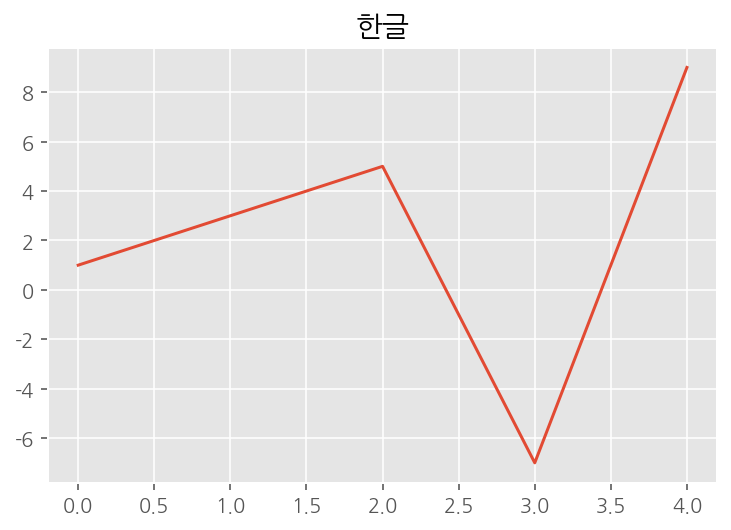

In [20]:
import koreanize_matplotlib
import matplotlib.pyplot as plt

plt.style.use("ggplot")
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# plt.rc("font", family="Apple Gothic")
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

* 그래프의 다양한 style 설정 : [Customizing Matplotlib with style sheets and rcParams — Matplotlib documentation](https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html)

In [21]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
# 시각화를 위한 폰트설정

# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당

# 폰트설정

# 마이너스폰트 설정

# 그래프 스타일 설정


In [ ]:
# 한글폰트 확인


## 여러 종목 한번에 시각화 하기

In [27]:
df

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,현대차,NAVER,삼성SDI,LG화학,기아,카카오
Date,,,,,,,,,,
2022-01-03,78600,NaN,128500,900338,210500,376000,650000,618000,82600,114500
2022-01-04,78700,NaN,128500,877607,210000,365500,649000,644000,83500,111500
2022-01-05,77400,NaN,125500,850923,213500,355000,648000,664000,85900,105500
2022-01-06,76900,NaN,125000,828192,214000,338500,642000,690000,85600,100000
2022-01-07,78300,NaN,127000,834122,215000,338000,636000,719000,86700,100000
...,...,...,...,...,...,...,...,...,...,...
2022-07-11,58800,395000.0,93700,829000,179000,240500,527000,522000,78000,71300
2022-07-12,58100,401000.0,93300,834000,179000,233500,528000,514000,78700,70300
2022-07-13,58000,400000.0,94000,832000,183500,237500,528000,517000,79800,71900


<AxesSubplot:xlabel='Date'>

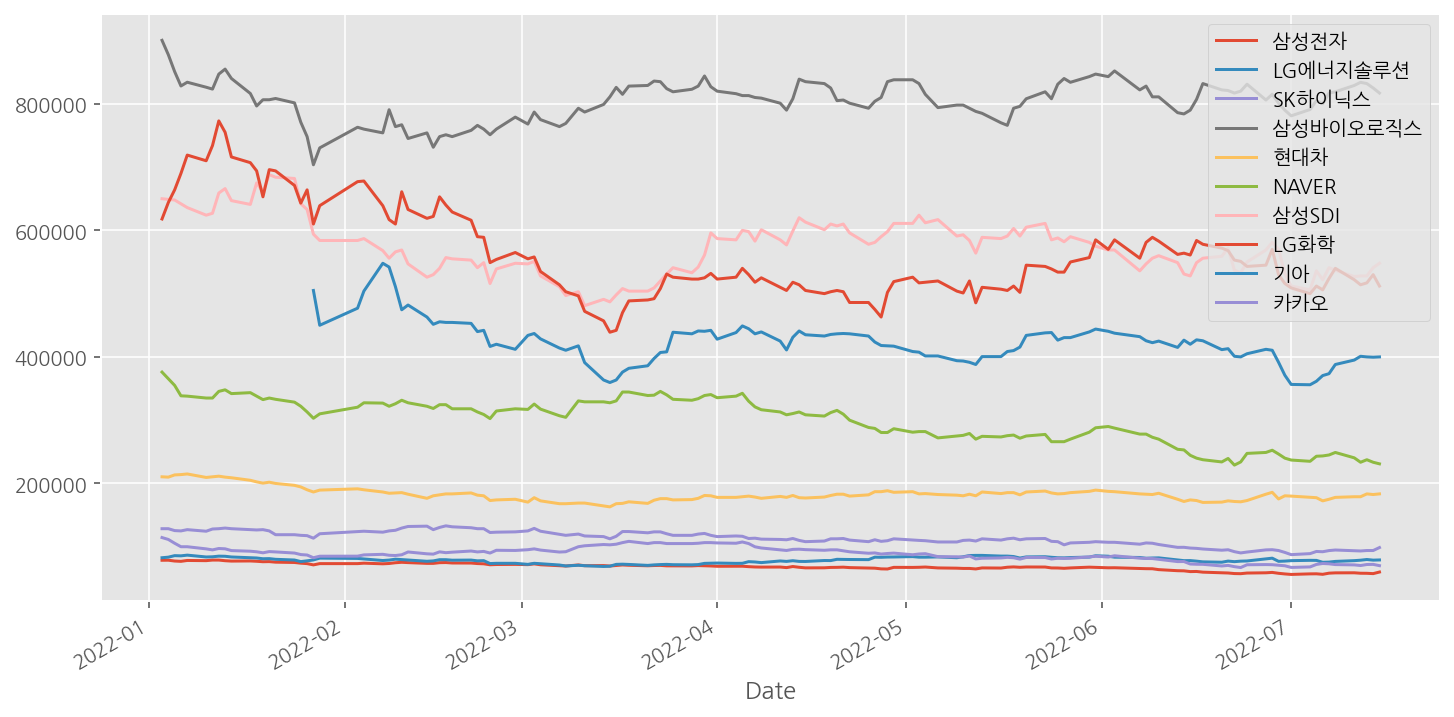

In [25]:
# 판다스의 plot을 통한 전체 데이터 프레임 시각화
df.plot(figsize=(12, 6))
# plt.legend(bbox_to_anchor=(1, 1))

<AxesSubplot:xlabel='Date'>

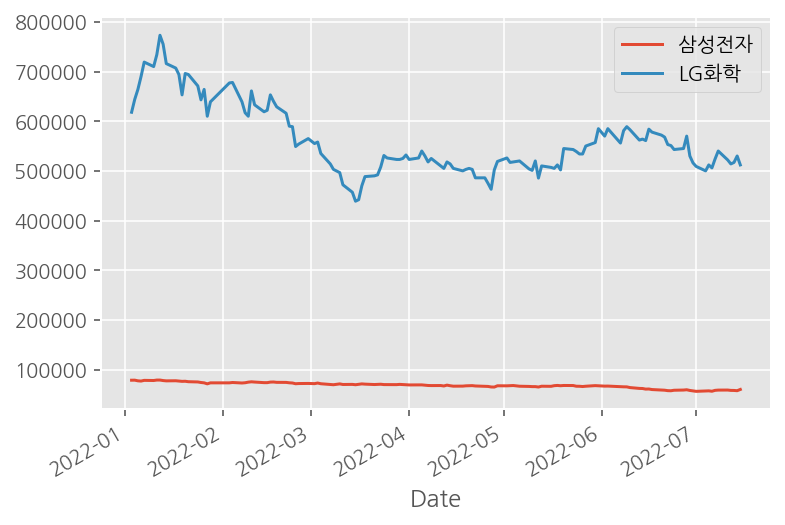

In [29]:
# 2개의 종목 비교하기 : "삼성전자", "LG화학" 을 plot으로 시각화 합니다.
df[["삼성전자", "LG화학"]].plot()

## 2축 그래프 사용하기

<AxesSubplot:xlabel='Date'>

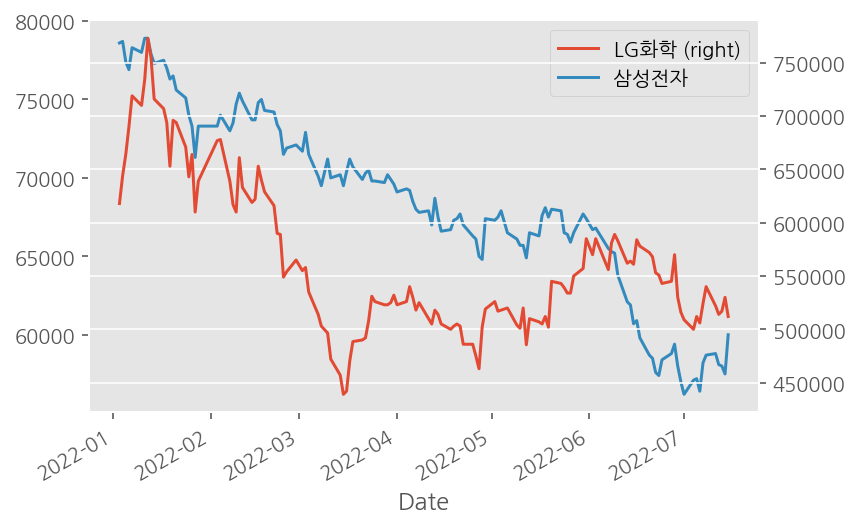

In [32]:
# secondary_y를 사용해 2축 그래프 그리기
df[["LG화학", "삼성전자"]].plot(secondary_y="LG화학")

## 기간 수익률 비교하기
* 가격마다 스케일이 다르기 때문에 데이터프레임 기준 첫날을 0으로 맞추고 상대적으로 상승했는지 하락했는지에 대한 값을 구합니다.
* 다른 스케일 값의 상승/하락 비율을 비교해 볼 수 있도록 합니다.
* 다른 스케일의 값을 조정할 때 표준화 혹은 정규화 방법을 사용하기도 합니다.
    * 표준화(standardization) : 
        * 데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 값으로 변환
        * (Z-score 표준화) : (측정값 - 평균) / 표준편차
    * 정규화(normalization) : 
        * 데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환
        * (측정값 - 최소값) / (최대값 - 최소값)

In [40]:
# df2 변수에 'LG화학', '삼성전자' 만 따로 가져옵니다.
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
# df_plot 에 수익률을 담아줍니다.
df2 = df[["LG화학", "삼성전자"]]
df_plot = (df2 / df2.iloc[0]) - 1

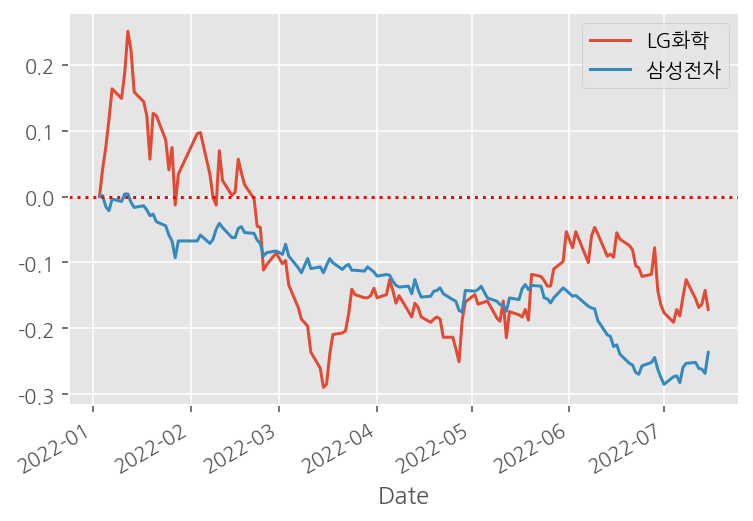

In [45]:
# 수익률 시각화 하기
df_plot.plot()
plt.axhline(0, c="r", linestyle=":")

## pyplot의 subplots 로 서브플롯 그리기

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

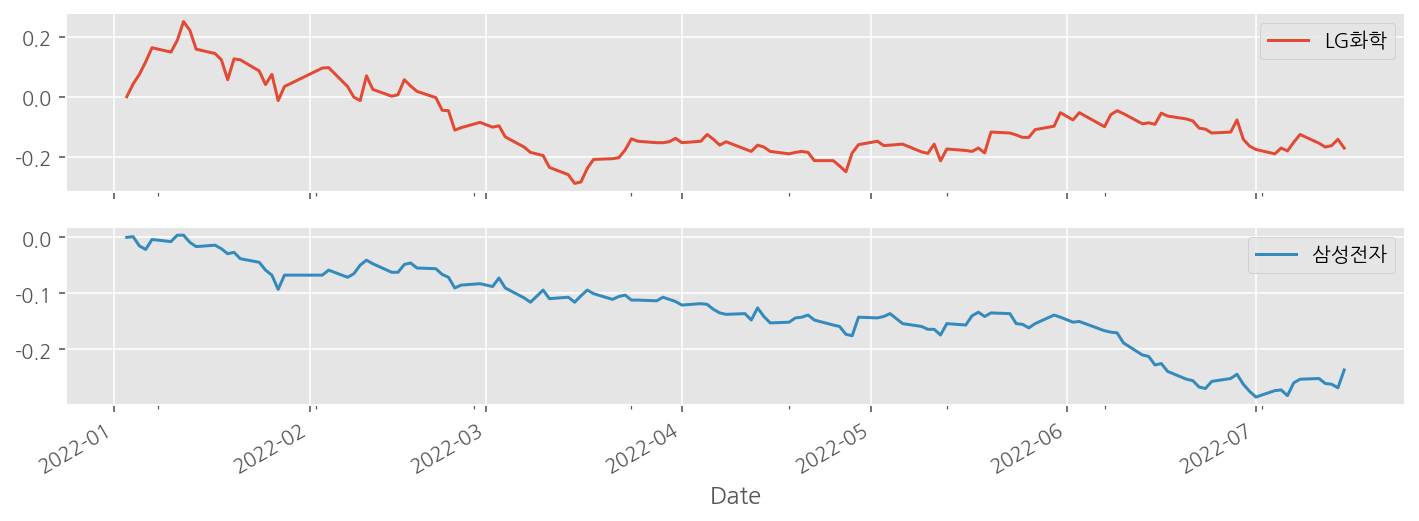

In [48]:
# pyplot의 subplots로 2개의 서브플롯을 만들고 2축그래프와 수익률 그래프를 비교해 봅니다.

df_plot.plot(subplots=True, figsize=(12, 4))

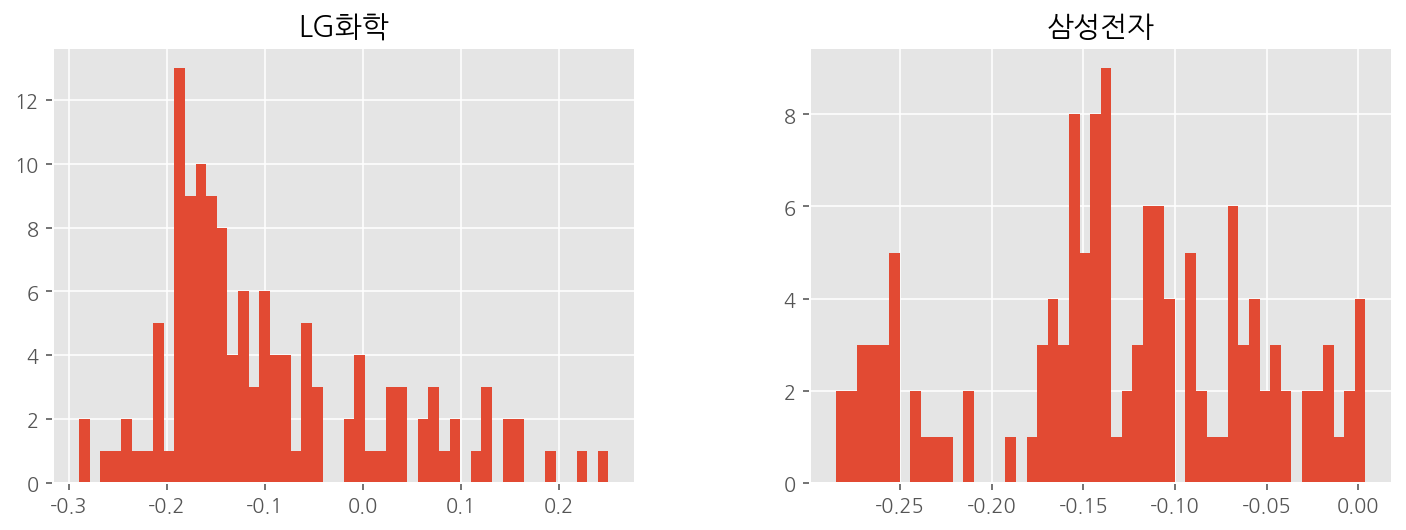

In [54]:
# df_plot 데이터프레임을 통해 수익률의 분포를 histogram으로 시각화 합니다.
_ = df_plot.hist(bins=50, figsize=(12, 4))

## 전체 데이터프레임 값에 대한 수익률 계산하기

In [ ]:
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
df_norm = (df / df.iloc[0]) - 1
df_norm

In [67]:
# 첫 거래일 기준으로 수익률을 계산합니다.
df_norm["LG에너지솔루션"] = (df["LG에너지솔루션"] / df["LG에너지솔루션"].dropna().iloc[0]) - 1

In [68]:
df_norm

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,현대차,NAVER,삼성SDI,LG화학,기아,카카오
Date,,,,,,,,,,
2022-01-03,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-01-04,0.001272,NaN,0.000000,-0.025247,-0.002375,-0.027926,-0.001538,0.042071,0.010896,-0.026201
2022-01-05,-0.015267,NaN,-0.023346,-0.054885,0.014252,-0.055851,-0.003077,0.074434,0.039952,-0.078603
2022-01-06,-0.021628,NaN,-0.027237,-0.080132,0.016627,-0.099734,-0.012308,0.116505,0.036320,-0.126638
2022-01-07,-0.003817,NaN,-0.011673,-0.073546,0.021378,-0.101064,-0.021538,0.163430,0.049637,-0.126638
...,...,...,...,...,...,...,...,...,...,...
2022-07-11,-0.251908,-0.217822,-0.270817,-0.079235,-0.149644,-0.360372,-0.189231,-0.155340,-0.055690,-0.377293
2022-07-12,-0.260814,-0.205941,-0.273930,-0.073681,-0.149644,-0.378989,-0.187692,-0.168285,-0.047215,-0.386026
2022-07-13,-0.262087,-0.207921,-0.268482,-0.075903,-0.128266,-0.368351,-0.187692,-0.163430,-0.033898,-0.372052


### 전체 종목의 수익률 시각화

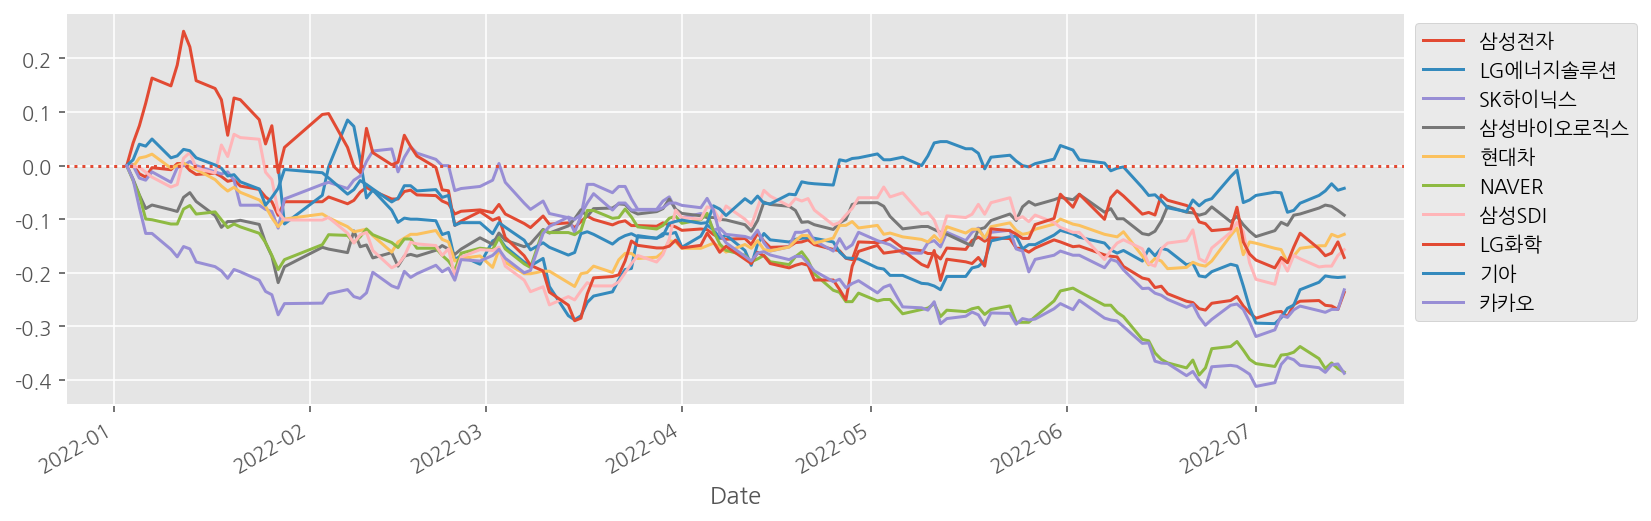

In [75]:
# df_norm 변수에 담긴 전체 종목에 대한 수익률을 시각화 합니다.
df_norm.plot(figsize=(12, 4))
plt.legend(bbox_to_anchor=(1, 1))
plt.axhline(0, linestyle=":")

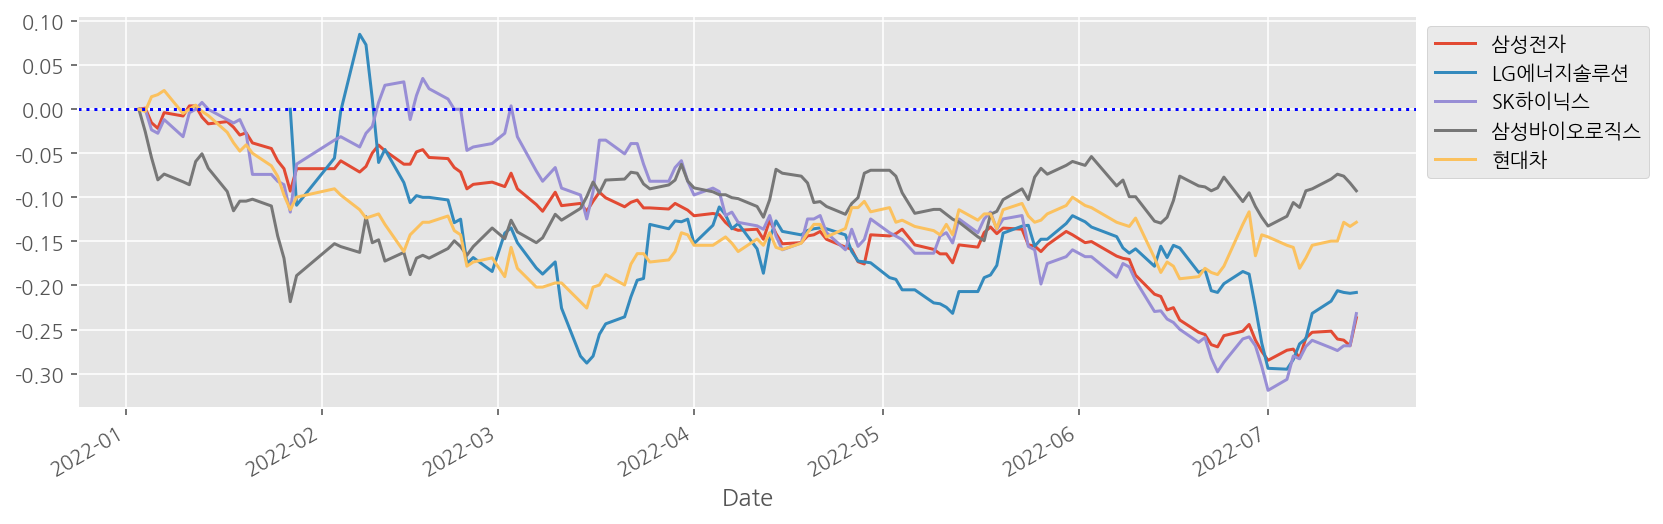

In [82]:
# 상위 5개 종목만
df_norm.iloc[:, :5].plot(figsize=(12, 4))
plt.legend(bbox_to_anchor=(1, 1))
plt.axhline(0, linestyle=":", c="b")

In [83]:
# 계산된 수익률에 대한 기술통계값 구하기
# mean : 평균
# 50% == median : 중앙값
# 25% : 1사분위수
# 75% : 3사분위수
df_norm.describe()

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,현대차,NAVER,삼성SDI,LG화학,기아,카카오
count,132.000000,114.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,-0.131226,-0.162524,-0.118860,-0.106002,-0.130137,-0.205392,-0.117844,-0.092472,-0.045023,-0.224759
std,0.075888,0.066730,0.092448,0.034985,0.052438,0.097592,0.070227,0.114411,0.054721,0.099822
min,-0.284987,-0.295050,-0.319066,-0.218441,-0.225653,-0.390957,-0.260000,-0.289644,-0.167070,-0.413974
25%,-0.164122,-0.205693,-0.167315,-0.125051,-0.162114,-0.274601,-0.169615,-0.172330,-0.075969,-0.285808
50%,-0.134860,-0.159901,-0.120623,-0.101767,-0.135392,-0.177527,-0.121538,-0.131068,-0.044794,-0.218341
75%,-0.071247,-0.131683,-0.037938,-0.080345,-0.114014,-0.124335,-0.076538,-0.037217,0.001816,-0.165939
max,0.003817,0.085149,0.035019,0.000000,0.021378,0.000000,0.058462,0.250809,0.049637,0.000000


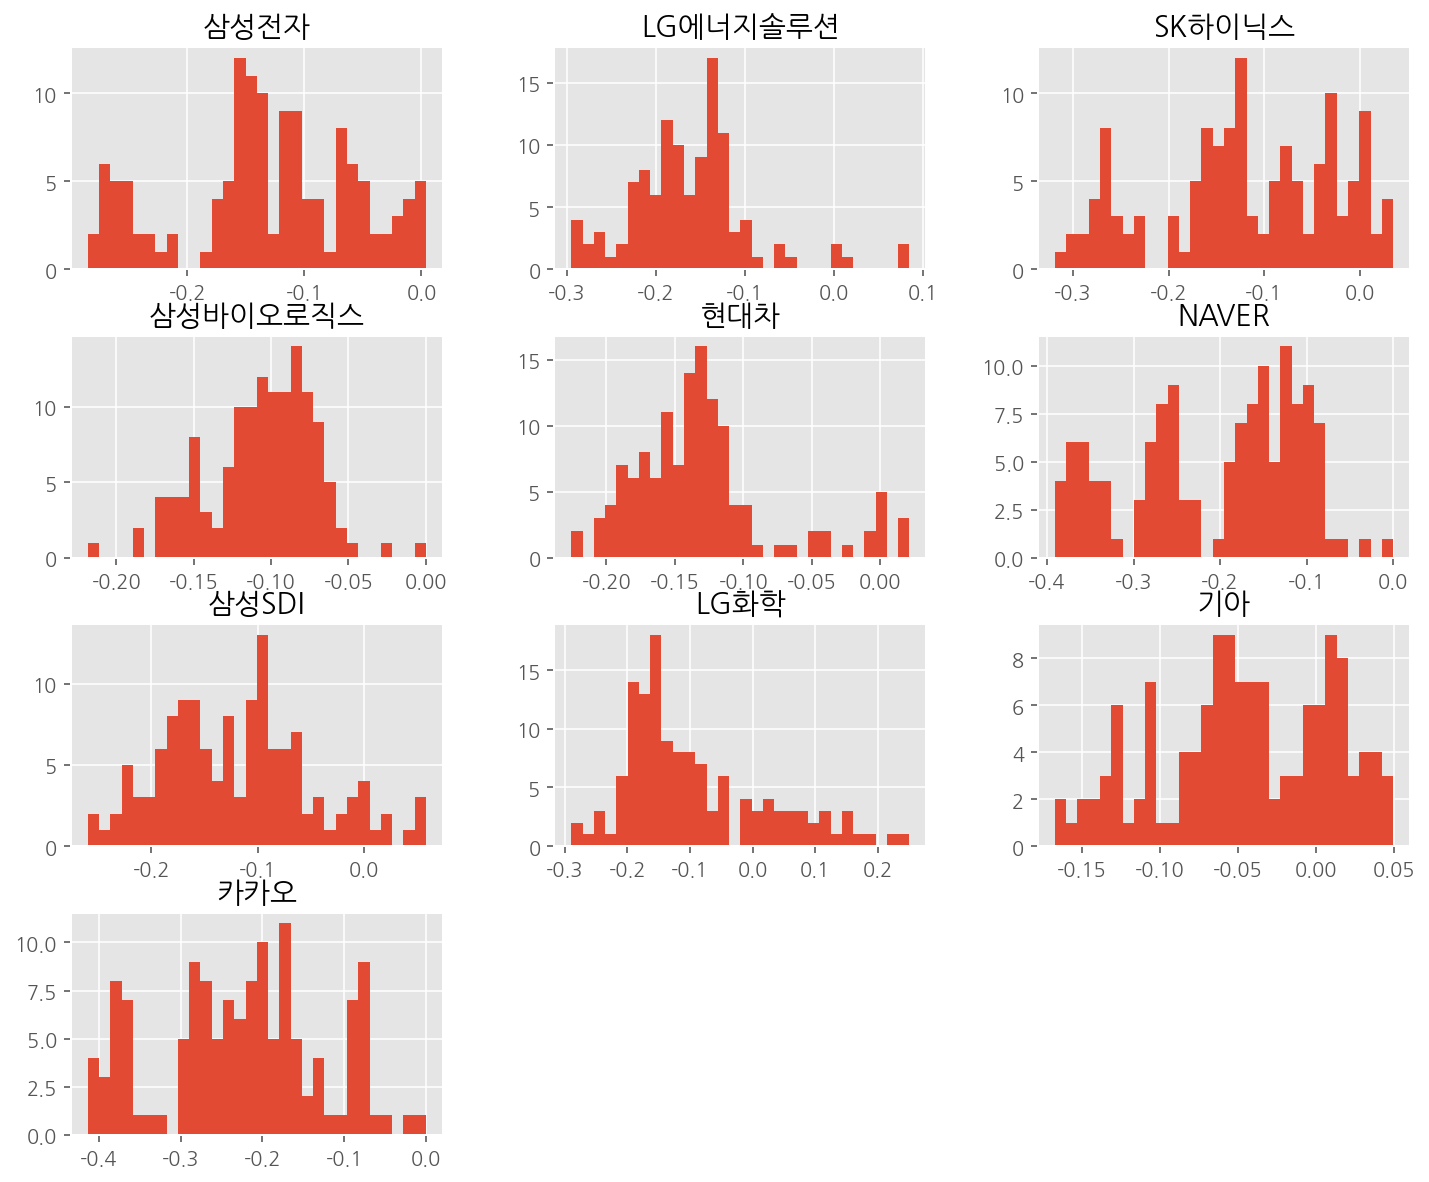

In [90]:
# 수익률에 대한 히스토그램 그리기
_ = df_norm.hist(figsize=(12, 10), bins=30)